Helpful link for the invert transform: https://discuss.pytorch.org/t/negative-of-an-image-using-pytorch-transforms/87059/6

In [1]:
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
import numpy as np


def x_invert(x):
    return transforms.functional.invert(x)

def IMNIST(data_path, permuted=False, permutation_seed=None):
    channel = 1
    im_size = (28, 28)
    num_classes = 10
    mean = [0.869]
    std = [0.3084]
    
#     x_invert = lambda x: transforms.functional.invert(x)
    transform = transforms.Compose([transforms.ToTensor(), \
                                    transforms.Lambda(x_invert),\
                                    transforms.Normalize(mean=mean, std=std)])
    if permuted:
        np.random.seed(permutation_seed)
        pixel_permutation = np.random.permutation(28 * 28)
        transform = transforms.Compose(
            [transform, transforms.Lambda(lambda x: x.view(-1, 1)[pixel_permutation].view(1, 28, 28))])

    dst_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
    dst_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)
    class_names = [str(c) for c in range(num_classes)]
    return channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test


def permutedIMNIST(data_path, permutation_seed=None):
    return IMNIST(data_path, True, permutation_seed)


/home/amriita/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_path = "~/datasets/"
IMNIST(data_path)

(1,
 (28, 28),
 10,
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
 [0.869],
 [0.3084],
 Dataset MNIST
     Number of datapoints: 60000
     Root location: /home/amriita/datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Lambda()
                Normalize(mean=[0.869], std=[0.3084])
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: /home/amriita/datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Lambda()
                Normalize(mean=[0.869], std=[0.3084])
            ))

In [4]:
_, _, _, _, _, _, train, test = IMNIST(data_path)

In [5]:
len(train)

60000

In [6]:
images, labels = next(iter(train))

In [7]:
images.shape

torch.Size([1, 28, 28])

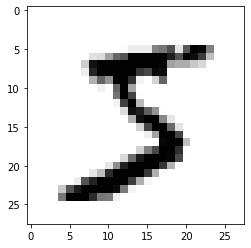

In [8]:
plt.imshow(images[0].reshape(28,28), cmap="gray")

In [9]:
from torchvision import datasets, transforms
import numpy as np


def MNIST(data_path, permuted=False, permutation_seed=None):
    channel = 1
    im_size = (28, 28)
    num_classes = 10
    mean = [0.1307]
    std = [0.3081]
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=mean, std=std)])
    if permuted:
        np.random.seed(permutation_seed)
        pixel_permutation = np.random.permutation(28 * 28)
        transform = transforms.Compose(
            [transform, transforms.Lambda(lambda x: x.view(-1, 1)[pixel_permutation].view(1, 28, 28))])

    dst_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
    dst_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)
    class_names = [str(c) for c in range(num_classes)]
    return channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test


def permutedMNIST(data_path, permutation_seed=None):
    return MNIST(data_path, True, permutation_seed)


In [10]:
_, _, _, _, _, _, otrain, otest = MNIST(data_path)

In [11]:
images, labels = next(iter(otrain))

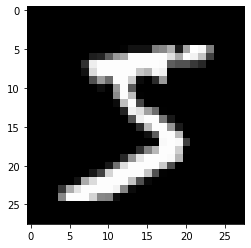

In [12]:
plt.imshow(images[0].reshape(28,28), cmap="gray")

In [13]:
import pickle
import dill

In [19]:
class DillPickle:
    def __init__(self, e):
        self.e = e
    def __getstate__(self):
        return dill.dumps(self.e)
    def __setstate__(self, state):
        self.e = dill.loads(state)

In [14]:
pickle.dumps(IMNIST(data_path))